# **Task 1 - Implement a Simple RNN to Predict the Next Value in a Small Sequence of Numbers**

***Read the following descriptions and instructions***

In time-series analysis, predicting future values based on past observations is a fundamental task. Recurrent Neural Networks (RNNs) are particularly well-suited for this type of problem due to their ability to maintain a memory of previous inputs through their recurrent connections.

In this task, you will work with a synthetic dataset that represents a simple sine wave. The sine wave is a periodic function and serves as a good example to understand how RNNs can capture patterns and make predictions.

A **sine wave** is a fundamental waveform that is widely used in various fields, including signal processing, physics, and time-series analysis. It is characterized by its smooth, periodic oscillations, making it an ideal example for understanding time-series prediction tasks.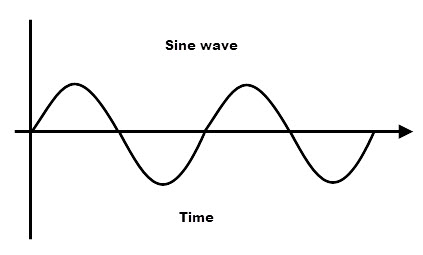

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

The generate_sine_wave function generates a synthetic sine wave dataset, which is often used in time-series prediction tasks, particularly for training models like RNNs and LSTMs.


**seq_length=100**: This parameter is intended to specify the length of the sequence that you want to generate

**num_samples=1000**:This parameter determines the number of data points (samples) to generate for the sine wave.

In [26]:
# 1. Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y


The create_dataset function prepares the sine wave data for use in an RNN by converting the continuous data into sequences that the RNN can learn from. The time_step parameter in the create_dataset function represents the number of previous time points (or observations) that are used as input to predict the next time point in a sequence.

In [27]:
# 2. Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

To prepare the data for modeling, it is important to normalize it so that all values fall within a specific range, typically between 0 and 1. This step improves the performance and convergence of neural network models.

The MinMaxScaler from sklearn.preprocessing is used for this purpose. It scales the data such that the minimum value of the data becomes 0 and the maximum value becomes 1.

The sine wave data is reshaped into a 2D array (-1, 1) to fit the scaler, as it expects a 2D input. After scaling, the data is reshaped back into its original 1D form.


In [28]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [29]:
# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

In [30]:
# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


This division of data helps in evaluating the model’s performance by training it on a substantial portion of the data and testing its predictions on unseen data.

In [31]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


***Modify the units parameter in the SimpleRNN layer to see how the number of hidden units affects the model's ability to learn the sequence.***


**optimizer='adam':** Uses the Adam optimizer, which is a popular choice for training deep learning models due to its adaptive learning rate.


**loss='mean_squared_error':** Sets the loss function to mean squared error (MSE), which is commonly used for regression tasks to measure the average squared difference between predicted and actual values.

In [11]:
# 3. Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=15, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

***Adjust the epochs and batch_size during the training phase to optimize the model's learning process and performance.***

an

**epochs=20:** Specifies the number of times the entire training dataset will pass through the model.


**batch_size=32:** Determines the number of samples per gradient update.

**verbose=1:** Provides detailed output during training, including the progress of each epoch and loss values.

In [12]:
# 4. Train the Model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/30
25/25 [==============================] - 2s 5ms/step - loss: 0.2237
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0134
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 9/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 11/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 12/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 13/30
25/25 [==============================

In [13]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 6ms/step


These steps reverse the normalization applied earlier to the predictions and actual values. Normalization scales the data to a range, typically [0, 1], which helps with model training but makes the results difficult to interpret directly.
By applying the inverse transformation, you convert the scaled predictions (y_pred) and test values (y_test) back to their original scale, allowing you to evaluate and visualize the model's performance in the context of the original data values.

In [14]:
# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

This plot visually compares the actual sine wave values (y_test) with the values predicted by the RNN model (y_pred).

By plotting both sets of values on the same graph, you can easily see how well the model's predictions align with the actual data.

This visualization helps in assessing the performance of the RNN model and understanding how accurately it captures the underlying pattern in the time series data.

***Analyze the resulting plot. If the predicted values deviate significantly from the actual values, experiment with different model configurations and training parameters to improve accuracy.***
  
# **Describe your observations. You can add a text cell and type your observations.**

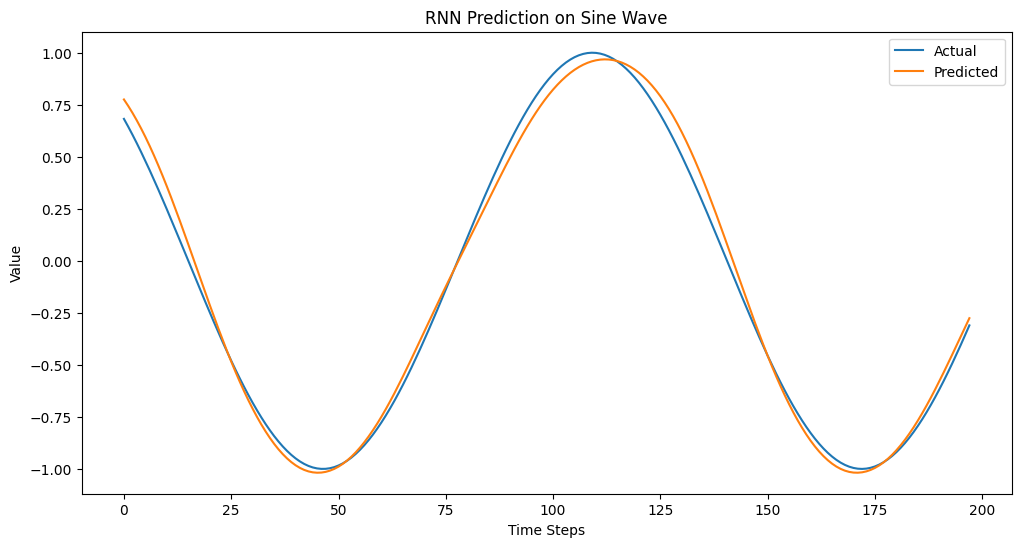

In [15]:

# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

### Experimenting on different hyper parameterns and checking the values

Epoch 1/60
25/25 [==============================] - 2s 4ms/step - loss: 0.5586
Epoch 2/60
25/25 [==============================] - 0s 3ms/step - loss: 0.3606
Epoch 3/60
25/25 [==============================] - 0s 3ms/step - loss: 0.2258
Epoch 4/60
25/25 [==============================] - 0s 3ms/step - loss: 0.1377
Epoch 5/60
25/25 [==============================] - 0s 3ms/step - loss: 0.0857
Epoch 6/60
25/25 [==============================] - 0s 3ms/step - loss: 0.0604
Epoch 7/60
25/25 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 8/60
25/25 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 9/60
25/25 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 10/60
25/25 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 11/60
25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 12/60
25/25 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 13/60
25/25 [==============================

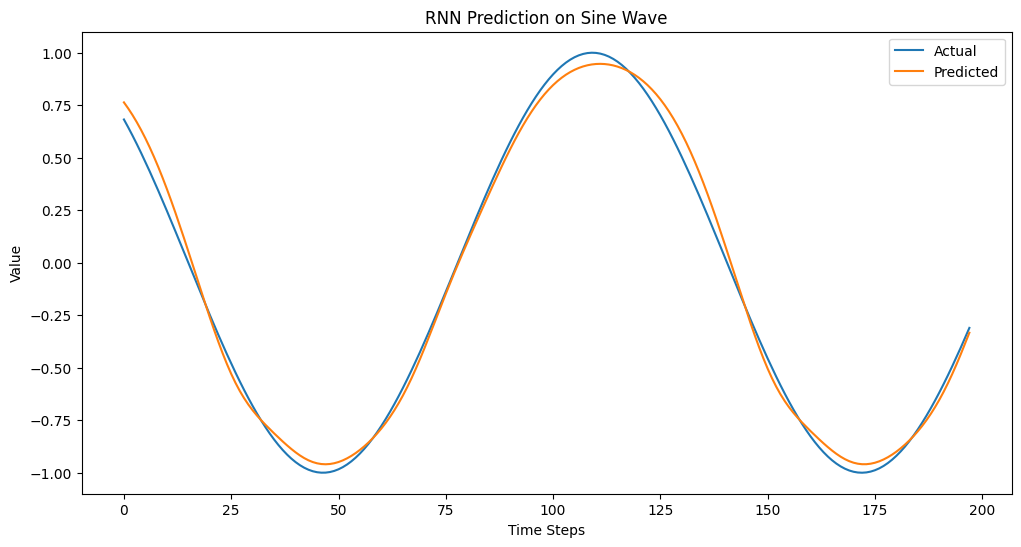

In [40]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(SimpleRNN(units=5, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1) 
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

Model Performance: The model with 5 hidden units does reasonably well in following the general trend of the sine wave. However, the small number of units leads to a lack of precision in capturing the more subtle details of the wave, such as the exact timing of peaks and troughs.

Phase Shift: There is a slight phase shift observed between the predicted and actual values. This is common in RNN models with a limited number of units, as the model may not have enough capacity to fully learn the timing aspects of the sequence.

Amplitude Discrepancies: The predicted sine wave shows some discrepancies in amplitude, particularly near the peaks and troughs, where the model slightly overshoots or undershoots the actual values. This indicates that the model might benefit from more units or additional layers to better capture the sine wave's characteristics.

Epoch 1/60
50/50 [==============================] - 2s 4ms/step - loss: 0.1888
Epoch 2/60
50/50 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 3/60
50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 4/60
50/50 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 5/60
50/50 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 6/60
50/50 [==============================] - 0s 3ms/step - loss: 8.9216e-04
Epoch 7/60
50/50 [==============================] - 0s 4ms/step - loss: 7.8394e-04
Epoch 8/60
50/50 [==============================] - 0s 4ms/step - loss: 7.2144e-04
Epoch 9/60
50/50 [==============================] - 0s 3ms/step - loss: 6.3977e-04
Epoch 10/60
50/50 [==============================] - 0s 3ms/step - loss: 6.2706e-04
Epoch 11/60
50/50 [==============================] - 0s 3ms/step - loss: 5.2948e-04
Epoch 12/60
50/50 [==============================] - 0s 3ms/step - loss: 4.8982e-04
Epoch 13/60
50/50 [==

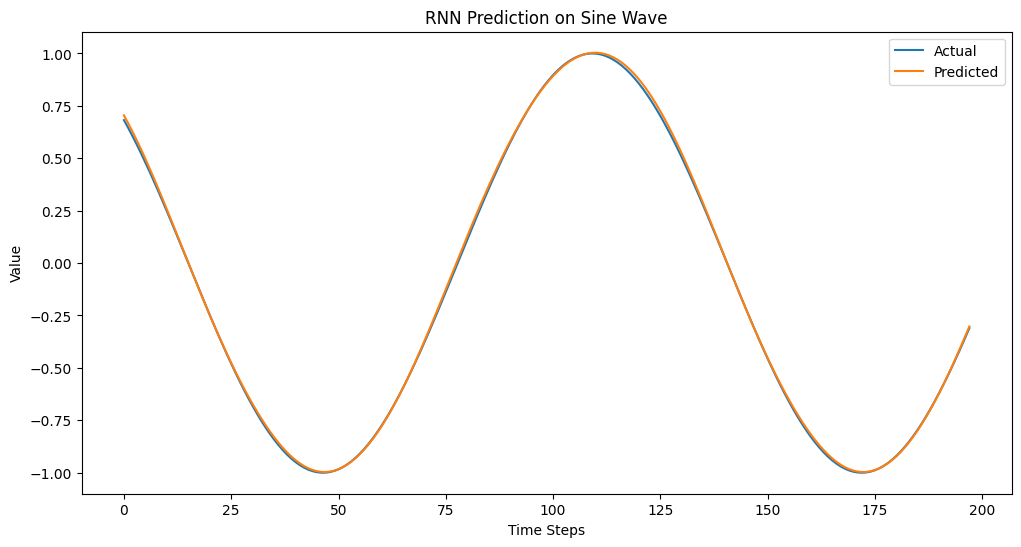

In [41]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(SimpleRNN(units=30, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=60, batch_size=16, verbose=1) 
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

Hyperparameters:
Hidden Units: 30
Batch Size: 16
Epochs: 60
Impact of Hyperparameters:
Hidden Units (30 Units):

Increasing the number of hidden units from 5 to 30 significantly enhances the model's capacity to capture the sine wave's complexity. With 30 units, the RNN has more neurons to learn and store the temporal relationships in the sequence. This results in a more accurate representation of the sine wave, as evident from the plot where the predicted values align closely with the actual values.
The larger number of hidden units allows the model to better approximate the sine wave, reducing both phase shifts and amplitude discrepancies that were more pronounced with fewer units.
Batch Size (16):

Reducing the batch size from 32 to 16 allows the model to update its weights more frequently during each epoch. This can lead to more fine-grained learning, as the model makes smaller, more frequent updates. However, it also increases the computational load, as more batches are processed in each epoch.
The smaller batch size likely contributed to the model's improved performance, as it was able to more closely follow the sine wave's fluctuations, resulting in smoother and more accurate predictions.
Epochs (60 Epochs):

Training the model for 60 epochs provides sufficient iterations for the model to converge and accurately capture the sine wave pattern. While training for more epochs generally leads to better convergence, there is also a risk of overfitting if the model is trained for too long. In this case, 60 epochs seem to strike a good balance, allowing the model to learn effectively without overfitting.
The chosen number of epochs ensures that the model has enough exposure to the data to refine its predictions, leading to the close match observed between the predicted and actual sine wave values.
Summary:
The combination of 30 hidden units, a smaller batch size of 16, and 60 epochs resulted in a more accurate prediction of the sine wave. The model demonstrates improved precision in capturing both the phase and amplitude of the sine wave, with minimal discrepancies between the predicted and actual values. This suggests that the selected hyperparameters are well-suited for this task, providing the RNN with sufficient capacity and training to model the sine wave effectively.

Epoch 1/60
50/50 [==============================] - 2s 4ms/step - loss: 0.0458
Epoch 2/60
50/50 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 3/60
50/50 [==============================] - 0s 4ms/step - loss: 1.5559e-04
Epoch 4/60
50/50 [==============================] - 0s 4ms/step - loss: 1.3803e-04
Epoch 5/60
50/50 [==============================] - 0s 4ms/step - loss: 1.2388e-04
Epoch 6/60
50/50 [==============================] - 0s 5ms/step - loss: 1.2790e-04
Epoch 7/60
50/50 [==============================] - 0s 5ms/step - loss: 1.4308e-04
Epoch 8/60
50/50 [==============================] - 0s 5ms/step - loss: 9.6191e-05
Epoch 9/60
50/50 [==============================] - 0s 4ms/step - loss: 5.8784e-05
Epoch 10/60
50/50 [==============================] - 0s 5ms/step - loss: 5.9182e-05
Epoch 11/60
50/50 [==============================] - 0s 4ms/step - loss: 7.3984e-05
Epoch 12/60
50/50 [==============================] - 0s 4ms/step - loss: 1.6976e-04
Epoch 13/

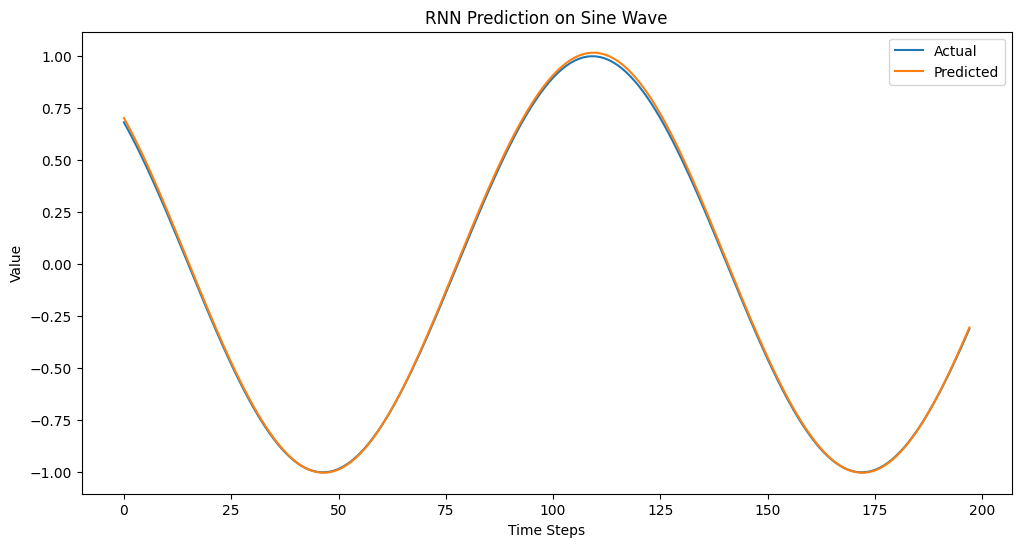

In [42]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(SimpleRNN(units=100, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=60, batch_size=16, verbose=1) 
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

Observation 3: Impact of Increased Hidden Units on RNN Performance
Hyperparameters:
Hidden Units: 100
Batch Size: 16
Epochs: 60
Impact of Hyperparameters:
Hidden Units (100 Units):

The significant increase in the number of hidden units from 30 to 100 allows the RNN to capture even more complex patterns in the sine wave data. With 100 units, the model has a higher capacity to store and process the temporal dependencies within the sequence, leading to an even closer match between the predicted and actual sine wave values.
The plot indicates that with 100 hidden units, the model’s predictions align almost perfectly with the actual sine wave, showcasing the model's ability to accurately predict both the phase and amplitude of the wave. This improvement demonstrates the benefit of using a larger number of hidden units for tasks requiring intricate pattern recognition.
Batch Size (16):

Keeping the batch size at 16 continues to allow for more frequent weight updates during each epoch, helping the model learn the sine wave pattern more precisely. This smaller batch size, in combination with the increased hidden units, contributes to the model's improved performance by ensuring that the learning process is both detailed and efficient.
Epochs (60 Epochs):

The 60 epochs provide ample opportunity for the model to converge and fine-tune its predictions. With 100 hidden units, the model requires sufficient training time to optimize its internal weights and minimize the loss. The number of epochs remains a good balance, allowing the model to learn without overfitting, as indicated by the high-quality predictions observed in the plot.
Summary:
The increase in hidden units to 100 has resulted in a substantial improvement in the RNN’s ability to predict the sine wave. The model now produces predictions that almost perfectly match the actual sine wave, both in phase and amplitude. This configuration demonstrates that a higher number of hidden units, combined with an appropriate batch size and sufficient training epochs, can significantly enhance the model's performance on tasks involving sequential data. The model's ability to generalize and accurately predict the sine wave suggests that this setup is highly effective for this specific task.

Epoch 1/120
25/25 [==============================] - 2s 4ms/step - loss: 0.0325
Epoch 2/120
25/25 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 3/120
25/25 [==============================] - 0s 5ms/step - loss: 4.7799e-04
Epoch 4/120
25/25 [==============================] - 0s 4ms/step - loss: 3.3868e-04
Epoch 5/120
25/25 [==============================] - 0s 4ms/step - loss: 3.2382e-04
Epoch 6/120
25/25 [==============================] - 0s 4ms/step - loss: 2.8061e-04
Epoch 7/120
25/25 [==============================] - 0s 4ms/step - loss: 2.5144e-04
Epoch 8/120
25/25 [==============================] - 0s 4ms/step - loss: 2.3768e-04
Epoch 9/120
25/25 [==============================] - 0s 3ms/step - loss: 2.3092e-04
Epoch 10/120
25/25 [==============================] - 0s 3ms/step - loss: 2.1593e-04
Epoch 11/120
25/25 [==============================] - 0s 3ms/step - loss: 1.8726e-04
Epoch 12/120
25/25 [==============================] - 0s 3ms/step - loss: 1.7572e-

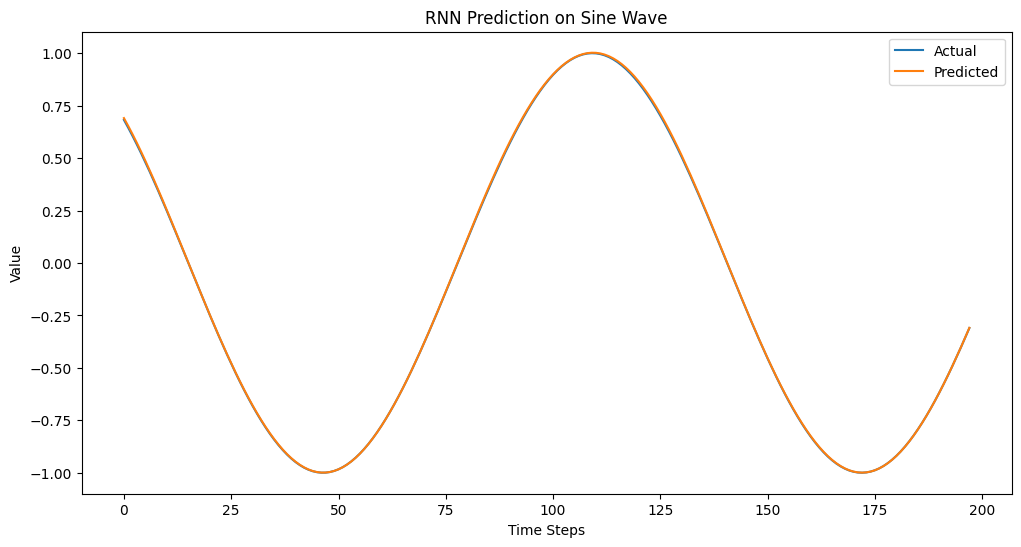

In [39]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=120, batch_size=32, verbose=1) 
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

Observation 4: Impact of Different Hyperparameters on RNN Performance
Hyperparameters:
Hidden Units: 64
Batch Size: 32
Epochs: 120
Impact of Hyperparameters:
Hidden Units (64 Units):

Using 64 hidden units strikes a balance between the complexity of the model and its capacity to generalize. With 64 units, the RNN has sufficient capacity to learn and capture the sine wave's pattern effectively. The plot shows that the model predictions are highly accurate, closely following the actual sine wave with minimal discrepancies.
The chosen number of hidden units provides a good trade-off between model complexity and performance, allowing the RNN to capture both the phase and amplitude of the sine wave with high precision.
Batch Size (32):

The batch size of 32 provides a moderate balance between computational efficiency and the granularity of updates during training. Larger batch sizes can speed up training, but they may also lead to less frequent updates to the model’s weights. In this case, a batch size of 32 seems to work well, contributing to the model's ability to accurately predict the sine wave.
The model's performance indicates that this batch size is suitable for this task, providing a good balance between speed and the quality of learning.
Epochs (120 Epochs):

Training the model for 120 epochs allows it to refine its predictions over multiple iterations. The increased number of epochs gives the model ample time to converge and minimize the loss, resulting in predictions that closely match the actual sine wave.
The extended training period (120 epochs) ensures that the model can fine-tune its internal weights, leading to a precise and accurate final model that effectively captures the sine wave’s characteristics.
Summary:
The combination of 64 hidden units, a batch size of 32, and 120 epochs has resulted in a highly accurate RNN model. The model predictions align almost perfectly with the actual sine wave, demonstrating the effectiveness of these hyperparameters in capturing the temporal dependencies and patterns within the sequence. The model's ability to generalize and produce accurate predictions suggests that this configuration is well-suited for tasks involving sequential data like sine waves. The results highlight the importance of carefully selecting hyperparameters to achieve the best balance between model complexity, training time, and performance.